In [1]:
import numpy as np
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.environ['rapp'])
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapl'] + '/azav')
from azav_util import plot_azav
from common import *
from plotcommon import *
from constants import *
labelsize = 8

In [2]:
dir_hydrotach = '/nobackup/lmatilsk/case_H/'
#dir_hydrotach = '/altair/loma3853/public/case_H/'
dir_dyntach = '/nobackup/lmatilsk/case_M/'
#dir_dyntach = '/altair/loma3853/public/case_M/'

In [3]:
dirs = [dir_hydrotach, dir_dyntach]

In [4]:
time_unit = compute_Prot(dirs[1])
Om0 = 2.*np.pi/time_unit*1e9/2/np.pi
print ("Om0 = ", Om0)

Om0 =  1370.3240600212189


In [5]:
nlevs = 20
# Set up the actual figure from scratch
fig_width_inches = 6.75 # TOTAL figure width, in inches
    # (i.e., 8x11.5 paper with 1/2-inch margins)
margin_inches = 1/16 # margin width in inches (for both x and y) and 
    # horizontally in between figures
margin_bottom_inches = 3/8
    # larger bottom margin to make room for colorbar
margin_top_inches = 1/4 # wider top title
lin_top_inches = 1/2 # even wider top for line plots

margin_right_inches = 1/8 # wider top title

naz = 2
nlin = 1

az_width_inches = 1.25
az_height_inches = 2*az_width_inches 
az_right_inches = 1/8

fig_height_inches = margin_top_inches + 2*(az_height_inches + margin_bottom_inches)

lin_left_inches = 5/8
lin_right_inches = 0

lin_width_inches = (fig_width_inches - (lin_left_inches + naz*(az_width_inches + az_right_inches) +\
                nlin*(lin_left_inches + lin_right_inches) + margin_right_inches))/nlin
lin_width_inches2 = (fig_width_inches - 2*lin_left_inches - 2*lin_right_inches - margin_inches)/2
lin_width_inches = min(lin_width_inches, lin_width_inches2)
#lin_width_inches = 2.75

lin_height_inches = az_height_inches - lin_top_inches + margin_top_inches

# "Margin" in "figure units"; figure units extend from 0 to 1 in BOTH 
# directions, so unitless dimensions of margin will be different in x and y
# to force an equal physical margin
margin_x = margin_inches/fig_width_inches
margin_y = margin_inches/fig_height_inches
margin_top = margin_top_inches/fig_height_inches
margin_bottom = margin_bottom_inches/fig_height_inches

# Subplot dimensions in figure units
az_width = az_width_inches/fig_width_inches
az_height = az_height_inches/fig_height_inches 
az_right = az_right_inches/fig_width_inches

lin_width = lin_width_inches/fig_width_inches
lin_height = lin_height_inches/fig_height_inches 
lin_left = lin_left_inches/fig_width_inches
lin_right = lin_right_inches/fig_width_inches

print ("fig size: ", fig_width_inches, fig_height_inches)
print ("line plot size: ", lin_width_inches, lin_height_inches)

fig size:  6.75 6.0
line plot size:  2.625 2.25


reading /nobackup/lmatilsk/case_H/data/AZ_Avgs-02467500_26215000.pkl
reading /nobackup/lmatilsk/case_M/data/AZ_Avgs-07802500_50220000.pkl
reading /nobackup/lmatilsk/case_M//data/Shell_Avgs-07802500_50222500.pkl


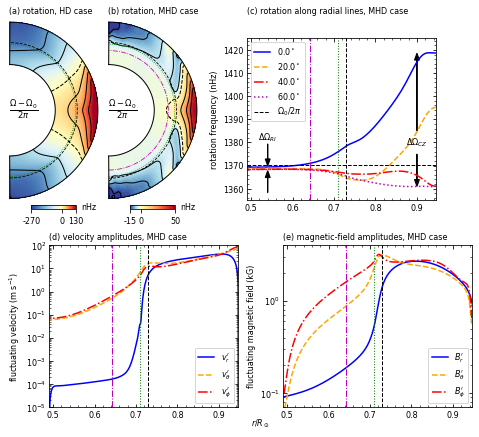

In [6]:
# Generate the actual figure of the correct dimensions
fig = plt.figure(figsize=(fig_width_inches, fig_height_inches))

titles = ['(a)', '(b)']
titles2 = ['rotation, HD case', 'rotation, MHD case']

minmax = [(-270, 130), (-15, 50)]
cbar_aspect = 1/10
for iplot in range(2):
    ax_left = margin_x + iplot*(az_width + az_right)
    ax_bottom = 1 - margin_top - az_height
    ax = fig.add_axes((ax_left, ax_bottom, az_width, az_height))
    
    datadir = dirs[iplot] + 'data/'
    the_file = get_widest_range_file(datadir, 'AZ_Avgs')
    print ('reading ' + the_file)
    di = get_dict(the_file)
    vals = di['vals']
    lut = di['lut']
    vr_av, vt_av, vp_av = vals[:, :, lut[1]], vals[:, :, lut[2]],\
            vals[:, :, lut[3]]

    # Get necessary grid info
    di_grid = get_grid_info(dirs[iplot])
    rr = di_grid['rr']
    cost = di_grid['cost']
    sint = di_grid['sint']
    tt_lat = di_grid['tt_lat']
    xx = di_grid['xx']
    tt = di_grid['tt']

    # Get differential rotation in the rotating frame. 
    Om = vp_av/xx*1.0e9/2/np.pi # rad/s --> nHz
    diffrot = Om
    
    if iplot == 0: # calculate rot. contrast in case H
        it0 = np.argmin(np.abs(tt_lat))
        it1 = np.argmin(np.abs(tt_lat + 60))
        it2 = np.argmin(np.abs(tt_lat - 60))

        Om_eq = Om[it0, :]
        Om_60 = (Om[it1, :] + Om[it2, :])/2.
        DOm_r_H = (Om_eq - Om_60)*1.0e9/2/np.pi
        DOm_cz_H = DOm_r_H[0]*1.0e9/2/np.pi
        DOm_rz_H = DOm_r_H[-1]*1.0e9/2/np.pi
        
    vmin, vmax = minmax[iplot]
    vmax = np.max(diffrot)
    vcenter = 0
    #rvals = np.array([])
    if iplot == 0:
        rvals_loc = [r_ovshoot_H, r_bcz_H]
        linecolors_loc = linecolors[1:]
        linestyles_loc = linestyles[1:]
    else:
        rvals_loc = [r_shear, r_ovshoot, r_bcz]
        linecolors_loc = linecolors[:]
        linestyles_loc = linestyles[:]
    contourstyles = 3*['-'] + ['--'] + 3*['-']

    plot_azav (diffrot, rr, cost, fig, ax, units='nHz', cbar_fs=labelsize, fullrange2=True,\
               nosci=True, cbar_prec=0, plotlatlines=False, rvals=rvals_loc, contourstyles=contourstyles,\
              linecolors1=linecolors_loc, linestyles1=linestyles_loc,linewidths1=0.8, minmax=minmax[iplot], cbar_aspect=cbar_aspect,\
               cbar_thick=1/16)

    # make title
    fig.text(ax_left, 1 - margin_top + margin_y, titles[iplot] + ' ' + titles2[iplot],\
             ha='left', va='bottom', fontsize=labelsize)
    # label plots a bit better
    #fig.text(ax_left + az_width, 1 - margin_top + margin_y, titles2[iplot],\
    #         ha='right', va='bottom', fontsize=labelsize)
    
    # label what we are plotting... dunno if this makes sense
    ax.text(0, 0, r'$\frac{\Omega-\Omega_0}{2\pi}$', ha='left', va='center', fontsize=labelsize*1.5)

# for the lin plot use rotating frame
Om += Om0

# DR contrast for case M
it0 = np.argmin(np.abs(tt_lat))
it1 = np.argmin(np.abs(tt_lat + 60))
it2 = np.argmin(np.abs(tt_lat - 60))
Om_eq = Om[it0, :]
Om_60 = (Om[it1, :] + Om[it2, :])/2.
DOm_r = (Om_eq - Om_60)
DOm_cz = DOm_r[0]
DOm_rz = DOm_r[-1]


# plot case M rot. freq along radial lines
ax_left += (margin_x + az_width + lin_left)
ax = fig.add_axes((ax_left,  2*margin_bottom + az_height, lin_width, lin_height))

rr_n = rr/rsun

lats = [0., 20., 40., 60.]
linestyles_loc = ['-', '--', '-.', ':']

# Get the spherical theta values associated with [lats]       
lats = np.array(lats)
colats = 90. - lats
theta_vals = colats*np.pi/180.

# Plot rotation vs radius at the desired latitudes
lw = 1.
count = 0
for theta_val in theta_vals:
    diffs = np.abs(tt - theta_val)
    diffs_S = np.abs(tt - (np.pi - theta_val))
    index = np.argmin(diffs)
    index_S = np.argmin(diffs_S)
    latitude = 90 - theta_val*180/np.pi
    ax.plot(rr_n, 0.5*(Om[index,:] + Om[index_S, :]),\
            label=r'$\rm{%2.1f}$' %latitude + r'$^\circ$',\
            linestyle=style_order[count], color=color_order[count])
    count += 1
    
# show the frame rotation rate
ax.plot(rr_n, Om0 + np.zeros_like(rr_n), 'k--', label=r'$\Omega_0/2\pi$', linewidth=lw)

# Label the axes
#ax.set_xlabel(r'$r/R_\odot$', fontsize=labelsize)
ax.set_ylabel('rotation frequency (nHz)',fontsize=labelsize)

# Set the axis limits
# x axis
xmin, xmax = np.min(rr_n), np.max(rr_n)
ax.set_xlim((xmin, xmax))
#ymin, ymax = ax.get_ylim()
ymin, ymax = 1355, 1425
ax.set_ylim((ymin, ymax))
yvals = np.linspace(ymin, ymax, 100)

# Mark radii if desired
yvals = np.linspace(ymin, ymax, 100)
count = 0
for rval in rvals_M:
    ax.plot(rval + np.zeros(100), yvals, color=linecolors[count], linestyle=linestyles[count], linewidth=lw)
    count += 1
    
# mark the rotation contrasts in the separate zones
dr = 0.04
dOm = 10.
arrow_len = 0.95*dOm
head_length = 0.3*dOm
head_width = 0.3*dr


# mark Domega RZ
tailwidth = 1e-4

r0_rz = 0.54
r0_cz = 0.9
ir0_rz = np.argmin(np.abs(rr_n - r0_rz))
ir0_cz = np.argmin(np.abs(rr_n - r0_cz))

nstd = 3.0
Omval = 0.5*(Om[it1, ir0_rz] + Om[it2, ir0_rz])
#plt.plot([r0_rz - dr/2, r0_rz + dr/2], [Omval, Omval], 'k-', linewidth=lw_loc)
plt.arrow(r0_rz, Omval - dOm, 0, arrow_len, head_length=head_length, head_width=head_width,\
        length_includes_head=True, color='k', width=tailwidth)

Omval = Omval + DOm_rz
arrtop = Omval + dOm
#plt.plot([r0_rz - dr/2, r0_rz + dr/2], [Omval, Omval], 'k-', linewidth=lw_loc)
plt.arrow(r0_rz, arrtop, 0, -arrow_len, head_length=head_length, head_width=head_width, length_includes_head=True,\
         color='k', width=tailwidth)
ax.text(r0_rz, arrtop, r'$\Delta\Omega_{RI}$', ha='center', va='bottom', fontsize=labelsize)

# mark Domega CZ
Omval = 0.5*(Om[it1, ir0_cz] + Om[it2, ir0_cz])
yc = 1380. # location of DOm cz label
dtext = 5.
#plt.plot([r0_cz - dr/2, r0_cz + dr/2], [Omval, Omval], 'k-', linewidth=lw_loc)
plt.arrow(r0_cz, yc - dtext, 0, -(yc - dtext - Omval), head_length=head_length, head_width=head_width,\
         color='k', length_includes_head=True, width=tailwidth)

Omval = Omval + DOm_cz
#plt.plot([r0_cz - dr/2, r0_cz + dr/2], [Omval, Omval], 'k-', linewidth=lw_loc)
plt.arrow(r0_cz, yc + dtext, 0, Omval - yc - dtext, head_length=head_length, head_width=head_width,\
         color='k', length_includes_head=True, width=tailwidth)

#plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=labelsize)
ax.legend(loc='upper left', fontsize=labelsize)

ax.text(r0_cz, yc, r'$\Delta\Omega_{CZ}$', ha='center', va='center', fontsize=labelsize)

# set title
fig.text(ax_left, 1 - margin_top + margin_y, '(c) rotation along radial lines, MHD case',\
         ha='left', va='bottom', fontsize=labelsize)

# label plots a bit better
#fig.text(ax_left + lin_width, 1 - margin_top + margin_y, 'MHD case',\
#         va='bottom', ha='right', fontsize=labelsize)
#line_height = 3/16/fig_height_inches
#fig.text(ax_left + lin_width, 1 - margin_top + margin_y - line_height, 'along radial lines',\
#         va='bottom', ha='right', fontsize=labelsize)


# Get ticks everywhere
plt.sca(ax)
plt.minorticks_on()
plt.tick_params(top=True, right=True, direction='in', which='both', labelsize=labelsize)




# make field amp plots
fontsize = 8
lw = 1
dirname = dir_dyntach

datadir = dirname + '/data/'

the_file = get_widest_range_file(datadir, 'Shell_Avgs') # rbcz = ACTUAL rbcz = 0.72 rsun
#the_file = the_file.replace()
print ('reading ' + the_file)
di = get_dict(the_file)
vals = di['vals']
lut = di['lut']
prot = compute_Prot(dirname)


# Convective velocity amplitudes, get these from KE
frke = vals[:, 0, lut[410]]
ftke = vals[:, 0, lut[411]]
fpke = vals[:, 0, lut[412]]

eq = get_eq(dirname)
rho = eq.density

vsq_r = frke/rho
vsq_t = ftke/rho
vsq_p = fpke/rho

amp_vr = np.sqrt(vsq_r)/100.
amp_vt = np.sqrt(vsq_t)/100.
amp_vp = np.sqrt(vsq_p)/100.

# Ful magnetic field amplitudes
rme = vals[:, 0, lut[1110]]
tme = vals[:, 0, lut[1111]]
pme = vals[:, 0, lut[1112]]

flucme = rme + tme + pme
meanme = vals[:, 0, lut[1102]] + vals[:, 0, lut[1103]] + vals[:, 0, lut[1104]] - flucme 

eightpi = 8*np.pi # convert to kG
amp_br = np.sqrt(rme*eightpi)*1e-3
amp_bt = np.sqrt(tme*eightpi)*1e-3
amp_bp = np.sqrt(pme*eightpi)*1e-3
amp_bmean = np.sqrt(meanme*eightpi)*1e-3
amp_bfluc = np.sqrt(flucme*eightpi)*1e-3

# vamp
ax1=fig.add_axes((lin_left, margin_bottom, lin_width, lin_height))

# bamp
ax2=fig.add_axes((lin_width + 2*lin_left,\
                margin_bottom, lin_width, lin_height))


# plot v amp
ordinate = 0
ax1.plot(rr_n, amp_vr, color=color_order[ordinate], linestyle=style_order[ordinate],label= r'$v_r^\prime$')
ordinate = 1
ax1.plot(rr_n, amp_vt, color=color_order[ordinate], linestyle=style_order[ordinate],label = r'$v_\theta^\prime$')
ordinate = 2
ax1.plot(rr_n, amp_vp, color=color_order[ordinate], linestyle=style_order[ordinate],label = r'$v_\phi^\prime$')
ax1.set_yscale('log')

ax1.legend(fontsize=fontsize, loc='lower right')

# set y limits
ymin, ymax = 1e-5, 1e2
ax1.set_ylim(ymin, ymax)
ax1.set_ylabel('fluctuating velocity (' + r'$\rm{m\ s^{-1}}$' + ')', va='bottom', fontsize=labelsize)

# set x limits
ax1.set_xlim(rr[-1]/rsun, rr[0]/rsun)
#ax1.set_xlabel(r'$r/R_\odot$', fontsize=labelsize)

# point ticks inward and get them on all sides
plt.sca(ax1)
plt.minorticks_on()
plt.tick_params(top=True, right=True, direction='in', which='both', labelsize=fontsize)

# add critical radii
yvals = np.linspace(ymin, ymax, 100)
count = 0
for rval in rvals_M:
    ax1.plot(rval + np.zeros(100), yvals, color=linecolors[count], linestyle=linestyles[count], linewidth=lw)
    count += 1

# plot B amp
ordinate = 0
ax2.plot(rr_n, amp_br, color=color_order[ordinate], linestyle=style_order[ordinate], label= r'$B_r^\prime$')
ordinate = 1
ax2.plot(rr_n, amp_bt, color=color_order[ordinate], linestyle=style_order[ordinate],  label=r'$B_\theta^\prime$')
ordinate = 2
ax2.plot(rr_n, amp_bp, color=color_order[ordinate], linestyle=style_order[ordinate], label=r'$B_\phi^\prime$')
#ax2.plot(rr, amp_bmean, 'g-.', label=r'$\overline{\mathbf{B}}$')
#ax1.set_yscale('log')

ax2.legend(fontsize=fontsize, loc='lower right')

# set y limits
ymin, ymax = 7e-2, 4
ax2.set_yscale('log')
ax2.set_ylim(ymin, ymax)
ax2.set_ylabel('fluctuating magnetic field (kG)', va='bottom', fontsize=labelsize)

# set x limits
ax2.set_xlim(rr[-1]/rsun, rr[0]/rsun)
#ax2.set_xlabel(r'$r/R_\odot$', fontsize=labelsize)

# point ticks inward and get them on all sides
plt.sca(ax2)
plt.minorticks_on()
plt.tick_params(top=True, right=True, direction='in', which='both', labelsize=fontsize)

# add critical radii
yvals = np.linspace(ymin, ymax, 100)
count = 0
for rval in rvals_M:
    ax2.plot(rval + np.zeros(100), yvals, color=linecolors[count], linestyle=linestyles[count], linewidth=lw)
    count += 1
    
    


# make labels
ax1.set_title('(d) velocity amplitudes, MHD case', loc='left', fontsize=fontsize)
ax2.set_title('(e) magnetic-field amplitudes, MHD case', loc='left', fontsize=fontsize)

#ax1.set_title('velocity amplitudes', loc='right', fontsize=fontsize)
#ax2.set_title('magnetic field amplitudes', loc='right', fontsize=fontsize)

# label bottom row axes
fig.text(lin_width + 1.5*lin_left, margin_y, r'$r/R_\odot$',\
         va='bottom', ha='center', fontsize=labelsize)

plt.savefig('images/flows_and_field_amp.png', dpi=300)

In [7]:

DOm_cz/Om0

0.04203969774714841

In [8]:
DOm_rz/Om0

0.0007613278295853198

In [9]:
DOm_cz_H/Om0

5456071815778164.0

In [10]:
DOm_rz_H/Om0

2178575910657926.2

In [11]:
ir0 = np.argmin(np.abs(rr/rsun - r_shear))
DOm_cz/DOm_r[ir0]

20.320723644276548

In [12]:
# see where it drops by a factor of 20
rr[np.argmin(np.abs(DOm_cz/DOm_r - 20))]/rsun

0.6410920909590426

Text(0.5, 1.0, 'DOmega, Case M')

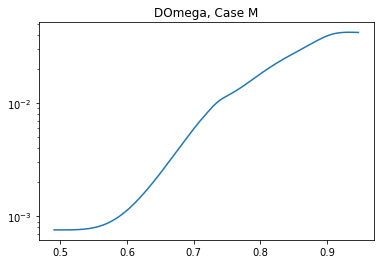

In [13]:
# plot the rotation contrast
plt.plot(rr/rsun, DOm_r/Om0)
plt.yscale('log')
plt.title('DOmega, Case M')

Text(0.5, 1.0, 'DOmega, Case H')

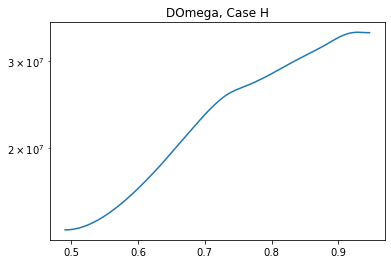

In [14]:
# plot the rotation contrast
plt.plot(rr/rsun, DOm_r_H/Om0)
plt.yscale('log')
plt.title('DOmega, Case H')